In [17]:
import numpy as np
from astropy.io import fits as pf

from astropy.modeling import models, fitting
from matplotlib import pyplot as plt 
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
infile1 = '../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
infile2 = '../galaxy_spectra/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'

In [3]:
spec1 = spec2d.Spec2d(infile1, hext=12, xtrim=[40, 170]) #  xtrim=[40, 500]


Loading file ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits (HDU=12)
The input dataset was trimmed
 xrange: 40:171.  yrange: 0:4096
Final data dimensions (x y): 131 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 131



In [4]:
spec1.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096





pypeit generated sky model will be used for skysubtraction


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 80.152565
 Clipped rms:  13.460249
 fmin (mean -   1 sigma):  66.692316
 fmax (mean +  10 sigma):  214.755054
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 104.643723
 Clipped rms:  46.558998
 fmin (mean -   1 sigma):  58.084724
 fmax (mean +  10 sigma):  570.233704

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 3.303260
 Clipped rms:  15.851709
 fmin (mean -   1 sigma):  -12.548450
 fmax (mean +  10 sigma):  161.820353


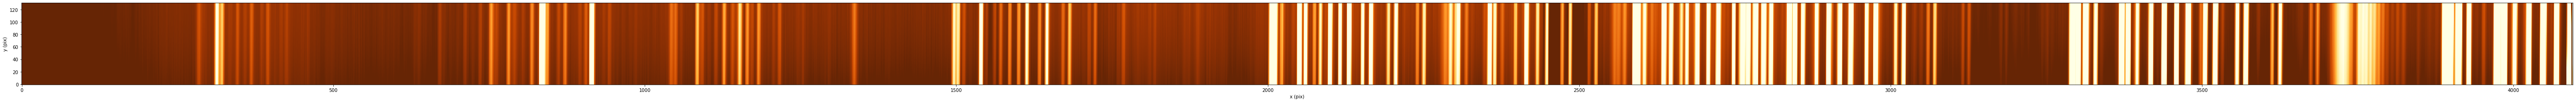

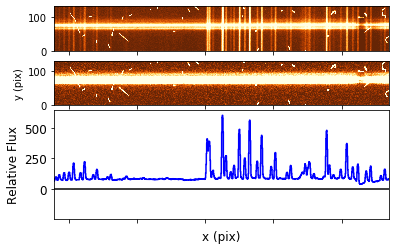

<Figure size 432x288 with 0 Axes>

In [5]:
spec1.display_spec()


sky model will be generated from data

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 88.890953
 Clipped rms:  13.937802
 fmin (mean -   1 sigma):  74.953151
 fmax (mean +  10 sigma):  228.268976

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 104.643723
 Clipped rms:  46.558998
 fmin (mean -   1 sigma):  58.084724
 fmax (mean +  10 sigma):  570.233704

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: -5.359089
 Clipped rms:  19.194780
 fmin (mean -   1 sigma):  -24.553870
 fmax (mean +  10 sigma):  186.588714


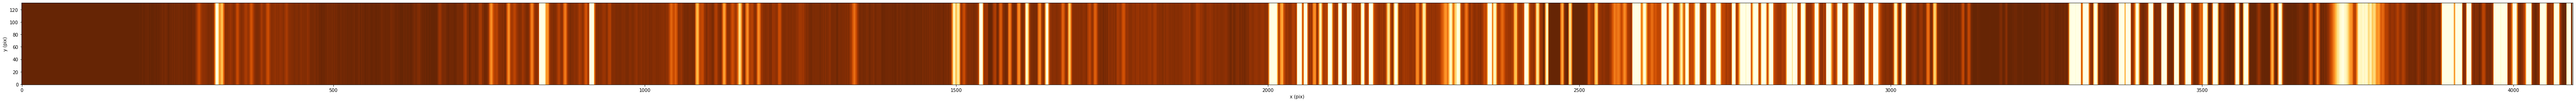

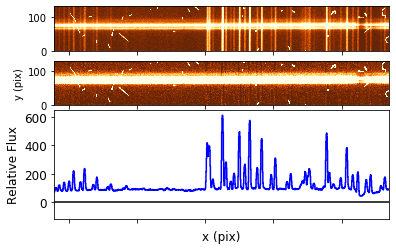

<Figure size 432x288 with 0 Axes>

In [5]:
spec1.display_spec(use_skymod=False)

Profile max value (before normalization) 915.044556


<IPython.core.display.Javascript object>


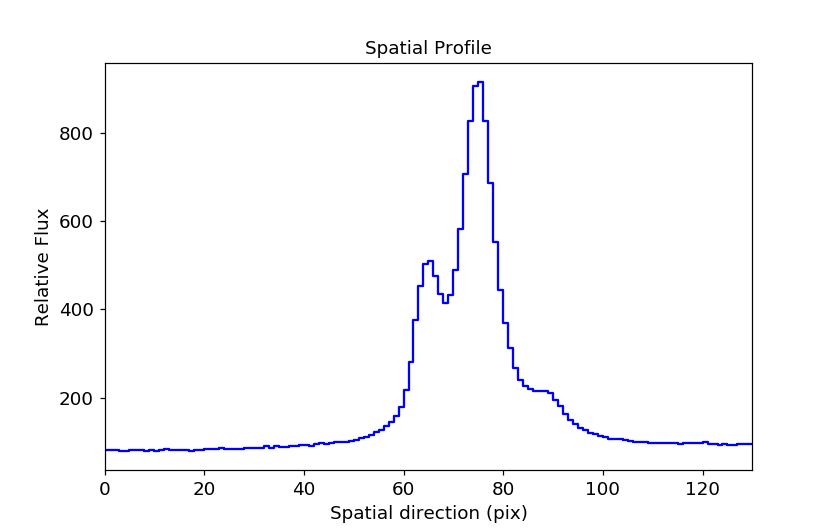

In [6]:
%matplotlib notebook
profile = spec1.spatial_profile(pixrange=[1900,2200])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 2
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 90

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 500, 65, 3

amplitude=500.000000, mu=65.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 200, 90, 3

amplitude=200.000000, mu=90.000000, sigma=3.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 800, 75, 3, 4.765

amplitude=800.000000, x_0=75.000000, gamma=3.000000, alpha=4.765000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Component

<IPython.core.display.Javascript object>


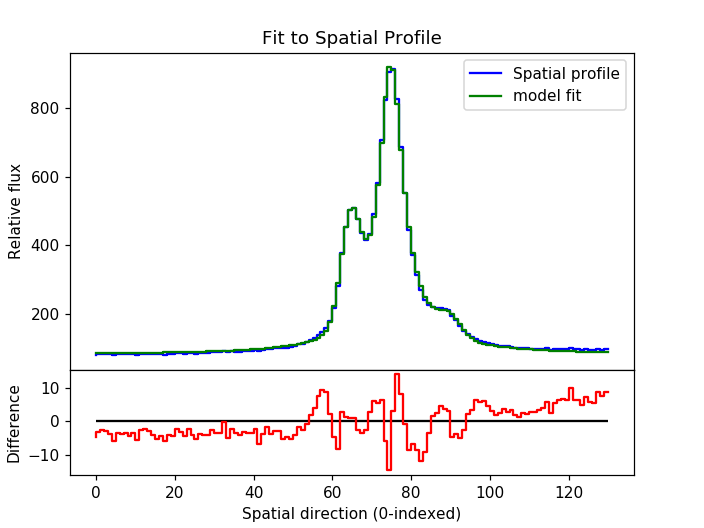

<IPython.core.display.Javascript object>


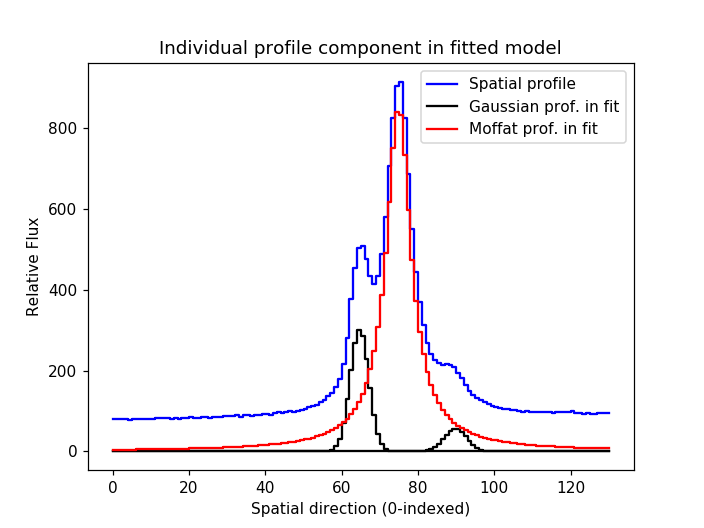


Do you want to start over ? : type yes/no
no


In [7]:
mod1 = spec1.initial_model()

In [8]:
# impose constraints
def tie_gamma(model):
     
    return model.gamma_4
    
def tie_alpha(model):
     
    return model.alpha_4                   
                    
def tie_pos1(model):
    return model.x_0_3 - 10.232
            
def tie_pos2(model):
    return model.x_0_3 + 14.887
            
        
mod1[1].mean.tied = tie_pos1 
mod1[2].mean.tied = tie_pos2 
#mod[3].x_0.tied = tie_pos
#mod[2].alpha.tied = tie_alpha
#mod[3].alpha.tied = tie_alpha


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=79.62028581)>

    [1]: <Gaussian1D(amplitude=300.92680703, mean=65.19308352, stddev=2.44911913)>

    [2]: <Gaussian1D(amplitude=56.65938053, mean=90.32875469, stddev=2.92207999)>

    [3]: <Moffat1D(amplitude=850.41758113, x_0=75.42457295, gamma=3.67326004, alpha=0.88089044)>
Parameters:
           c0_0          amplitude_1    ...      gamma_3            alpha_3      
    ----------------- ----------------- ... ------------------ ------------------
    79.62028580831992 300.9268070332595 ... 3.6732600378369136 0.8808904376150605

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=79.60172253)>

    [1]: <Gaussian1D(amplitude=301.28862949, mean=65.

<IPython.core.display.Javascript object>


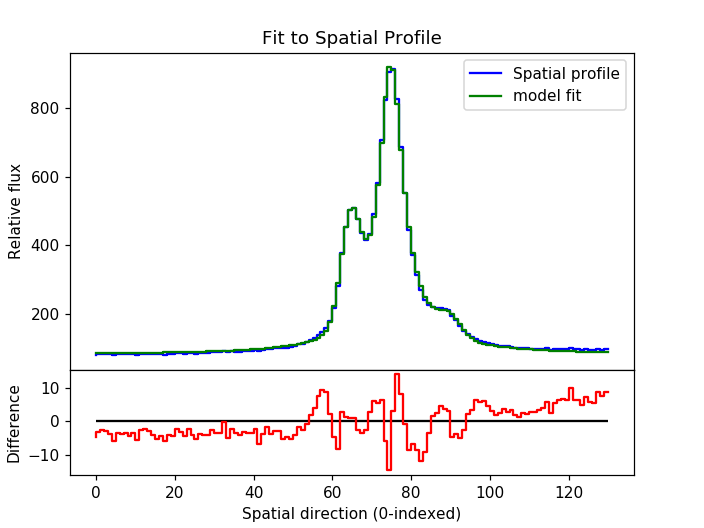

<IPython.core.display.Javascript object>


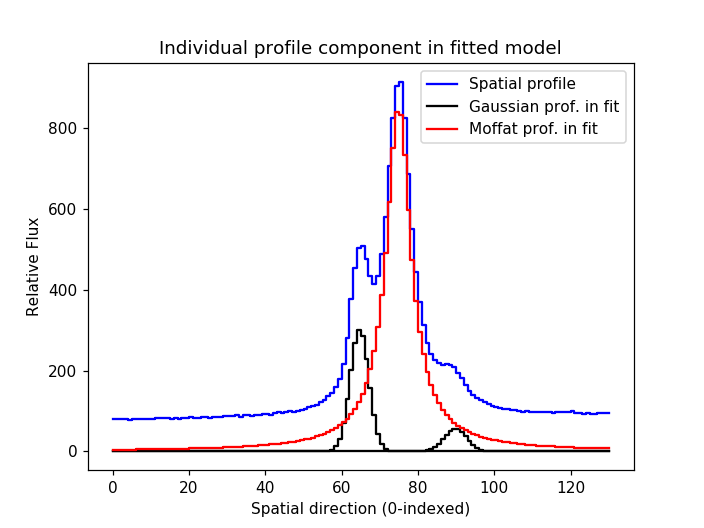

In [9]:
 mod_new = spec1.refined_model(mod1)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 136 segments
  of the 2D spectrum with stepsize=30 pix ...
    Done
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 2 to parameter: stddev_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


<IPython.core.display.Javascript object>


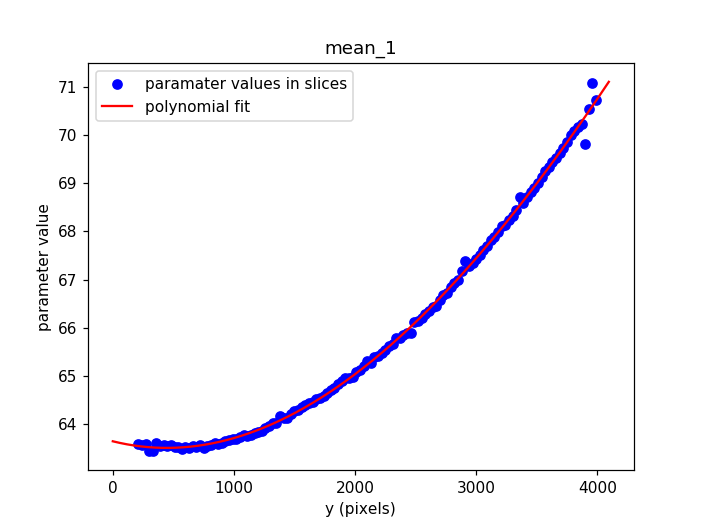

<IPython.core.display.Javascript object>


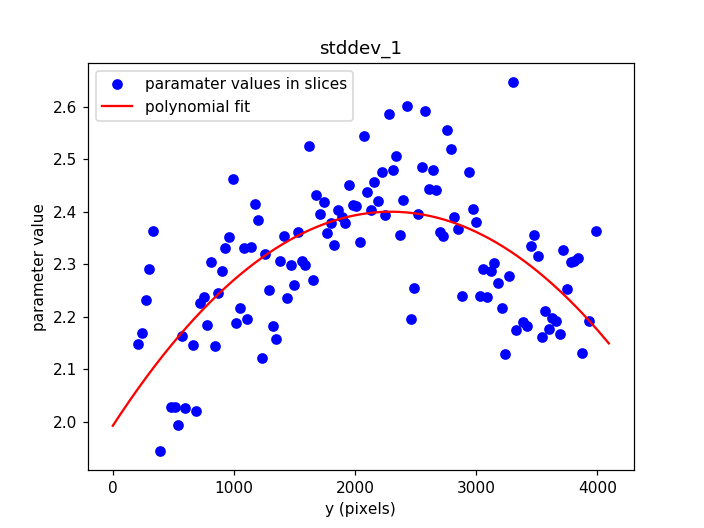

<IPython.core.display.Javascript object>


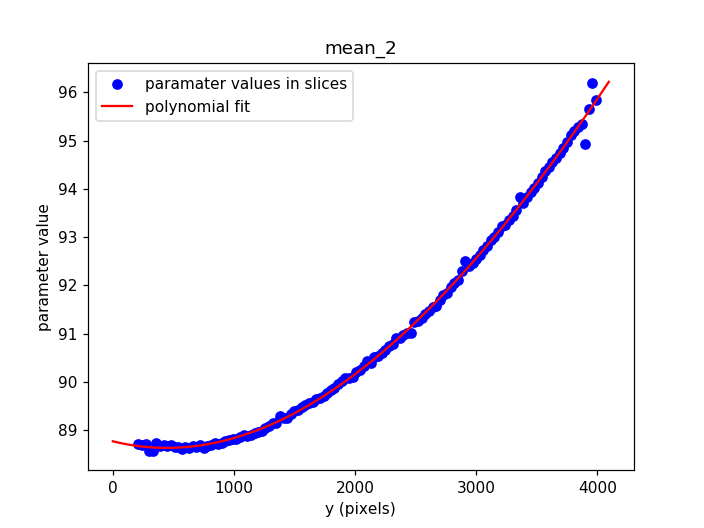

<IPython.core.display.Javascript object>


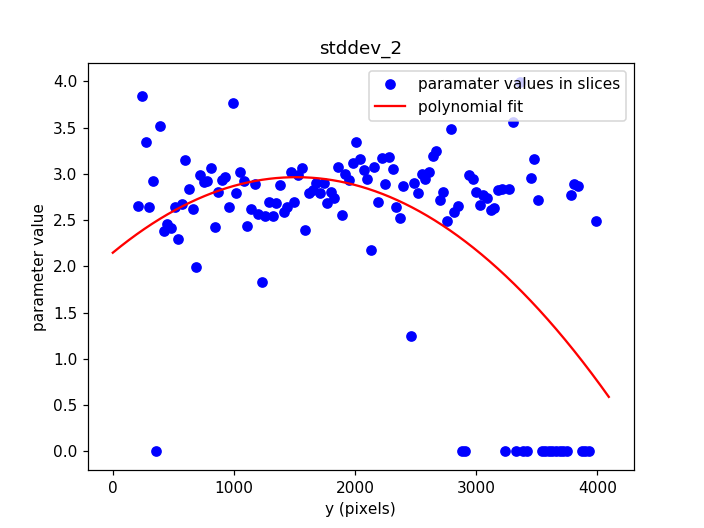

<IPython.core.display.Javascript object>


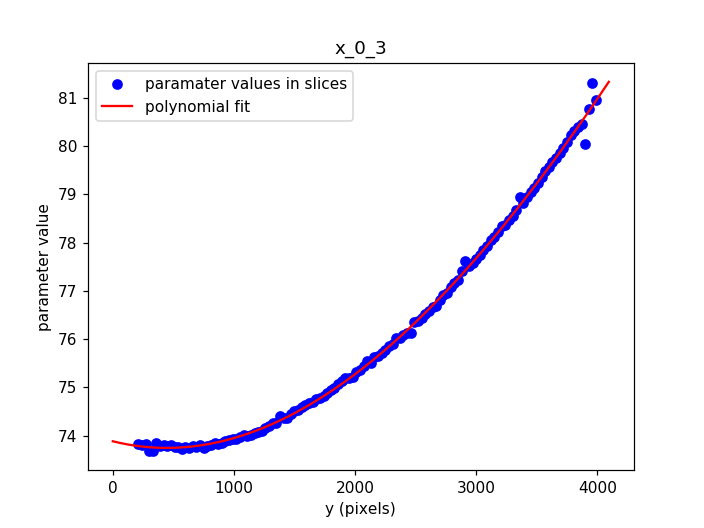

<IPython.core.display.Javascript object>


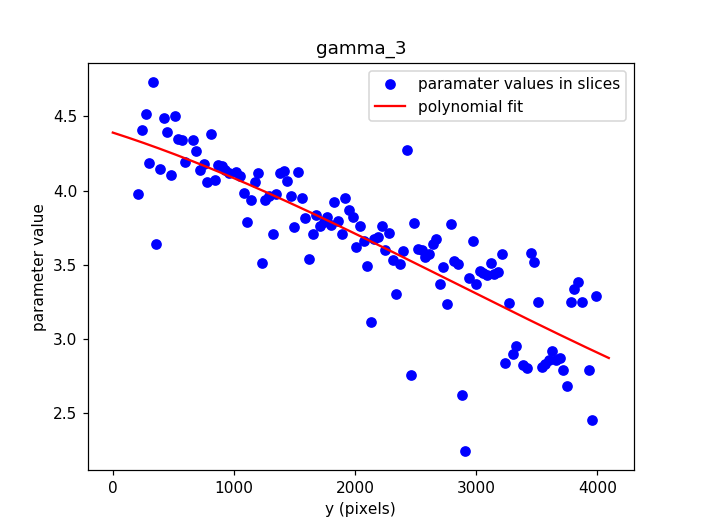

<IPython.core.display.Javascript object>


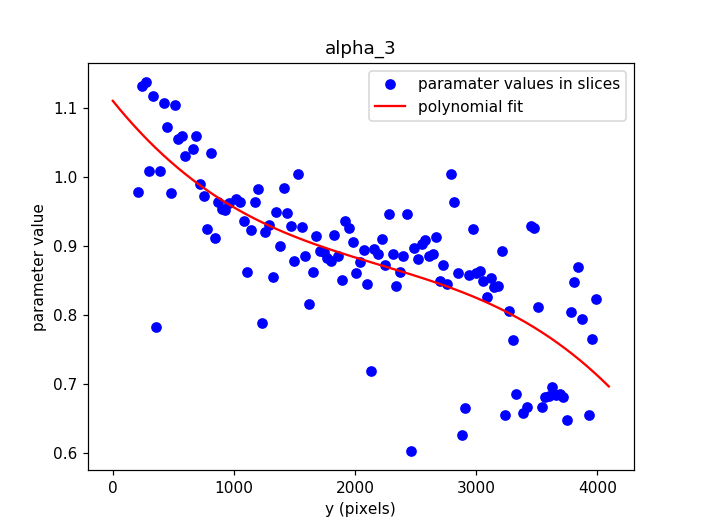

In [10]:
spec1.find_and_trace(mod_new, stepsize=30, fitorder={'stddev_1':2, 'stddev_2':2}, 
                    fitrange=[200,4000])  

In [33]:
mean_1 = np.round(spec1.parm_tab['mean_1'])
mean_2 = np.round(spec1.parm_tab['mean_2'])
x0_3 = np.round(spec1.parm_tab['x_0_3'])

In [18]:
wavim = pf.open(infile1)[19].data

In [41]:
gaus1_wav = np.zeros(len(mean_1))
gaus2_wav = np.zeros(len(mean_2))
moff1_wav = np.zeros(len(mean_1))

for i in range(len(mean_1)):
    gaus1_wav[i] = wavim[i][int(mean_1[i])]
    
for i in range(len(mean_1)):
    gaus2_wav[i] = wavim[i][int(mean_2[i])]
    
for i in range(len(mean_1)):
    moff1_wav[i] = wavim[i][int(x0_3[i])]

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Plotting the spectrum


<IPython.core.display.Javascript object>


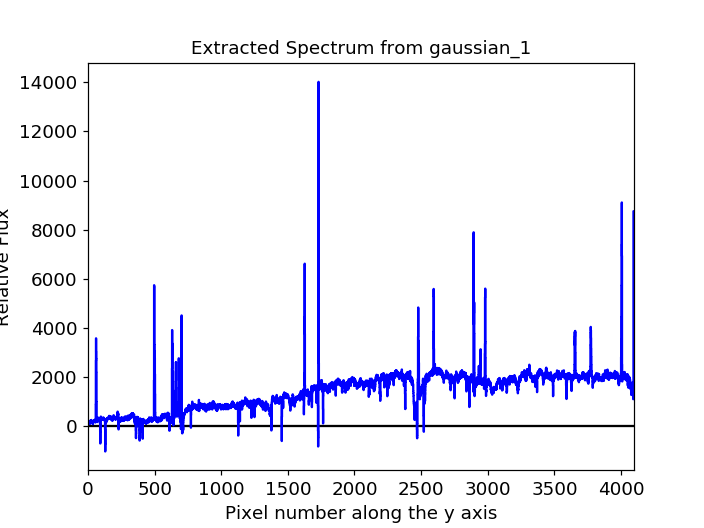

<IPython.core.display.Javascript object>


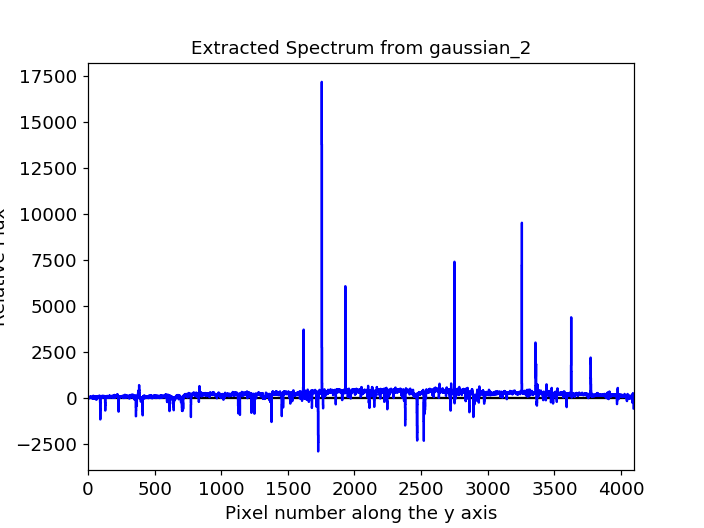

<IPython.core.display.Javascript object>


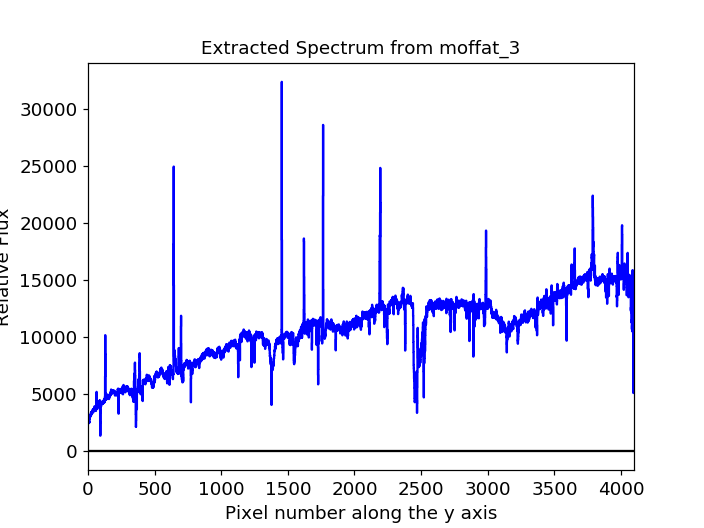

In [44]:
spec1.extract(method='modelfit')


In [55]:
spec_gauss1 = spec1d.Spec1d(wav=gaus1_wav, flux=spec1.spectra[0][1]['flux'])
spec_gauss2 = spec1d.Spec1d(wav=gaus2_wav, flux=spec1.spectra[1][1]['flux'])

 Spectrum Start:  5648.49
 Spectrum End:     8924.68
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5648.46
 Spectrum End:     8924.55
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


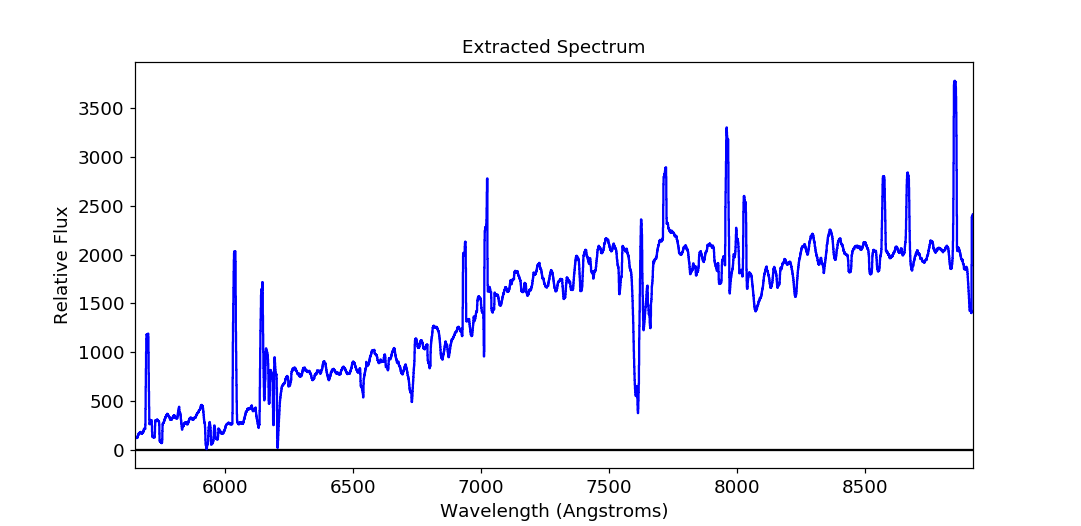

In [58]:
spec_gauss1.smooth(15)

<IPython.core.display.Javascript object>


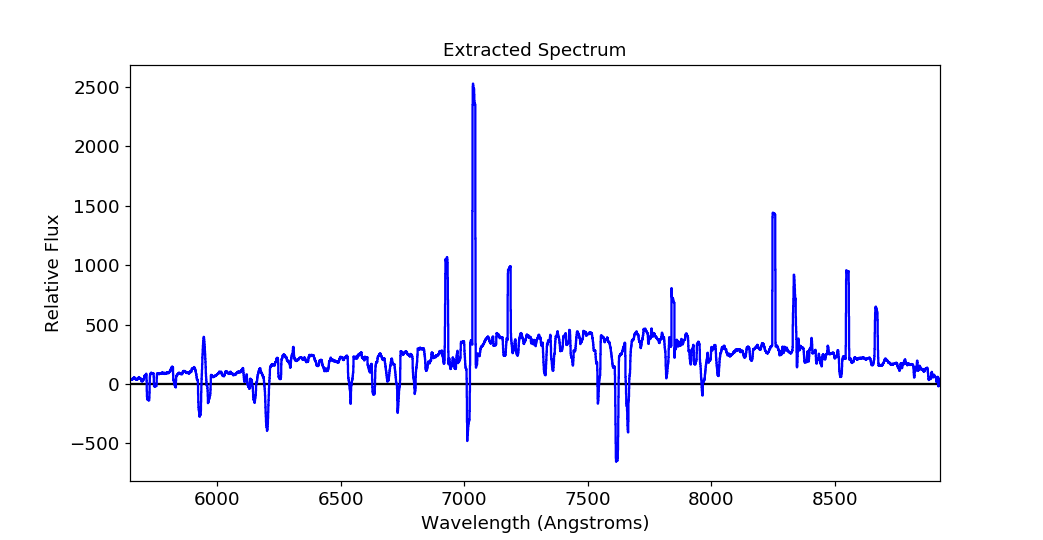

In [59]:
spec_gauss2.smooth(15)